# HomeWork #1

Anna Anikina

## 1 Optimization problem example – 1 point

$V = \pi R^2 h$

$h = \frac{V}{\pi R^2}$

$S = 2 \pi R^2 + 2 \pi R h$

$S(R) = 2 \pi (R^2 + Rh)$

$S(R) = 2 \pi (R^2 + \frac{V}{\pi R})$

$S' = 2 \pi (2R - \frac{V}{\pi R^2}) = 0$

$2R - \frac{V}{\pi R^2} = 0$

$2 \pi R^3 - V = 0$

$R^3 = \frac{V}{2 \pi}$

Answer:

$R = (\frac{V}{2 \pi})^{1/3}$

$h = (\frac{4V}{\pi})^{1/3}$

## 2 Optimality conditions – 3 points

$f(x) = \frac{3}{2} (x^2_1 + x^2_2) + (1 + a)x_1 x_2 - (x_1 + x_2) + b$

$
\begin{cases}
   f'_{x_1} = 3 x_1 + (1 + a)x_2 - 1 = 0\\
   f'_{x_2} = 3 x_2 + (1 + a)x_1 - 1 = 0
\end{cases}
$

$
\begin{cases}
   3 x_1 + (1 + a)x_2 - 1 = 0\\
   3 x_2 + (1 + a)x_1 - 1 = 0
\end{cases}
$

$3 x_1 + (1+a) x_2 - 3 x_2 - (1 + a) x_1 = 0$

$3(x_1 - x_2) + (1+a)(x_2 - x_1) = 0$

$(x_1 - x_2)(2 + a) = 0$

$x_1 = x_2$

$3 x_1 + (1 + a)x_1 - 1 = 0$

$(4 + a) x_1 = 1$

$x_1 = \frac{1}{4+a} = x_2$

Second derivative matrix:

$
\begin{bmatrix}
    3      & 1 + a \\
    1+a      & 3 
\end{bmatrix}
$

$\Delta_1 > 0$

$\Delta_2 = 9 - (a + 1)^2 = 9 - a^2 - 1 - 2a = 8 - a^2 - 2a$

For local min $\Delta_2$ should be $>0$

$D = 4 + 32 = 36$

$\sqrt{D} = 6$

$a_{1,2} = \frac{2 \pm 6}{-2} = \begin{cases}
   -4\\
   2
\end{cases}$

$8 - a^2 - 2a < 0$

$(a+4)(a-2) < 0$

Answer:

For local min: $b \in \mathbb {R}$ and $a \in (-4; 2)$

There are no extremums in other points.

## 3 Nelder Mead method – 8 points

Algorithm from: https://www.scilab.org/sites/default/files/neldermead.pdf

In [1]:
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np



def compute(point):
    #domain should be < 25
    domain = (point[0]+5)**2 + (point[1]+5)**2
    if domain >= 25:
        #print('Point does not belong to this domain:', point)
        return np.inf
    else:
        answer = math.sin(point[1])*math.exp((1-math.cos(point[0]))**2) + math.cos(point[0])*math.exp((1 - math.sin(point[1]))**2) + (point[0] - point[1])**2
        return answer
    
def sort_points(point1, point2, point3):
    
    f1 = compute(point1)
    f2 = compute(point2)
    f3 = compute(point3)
    
    #print(f1,f2,f3)
    

    if f1 < f2 and f1 < f3:
        best = point1
        if f2 < f3:
            good = point2
            worst = point3
        else:
            good = point3
            worst = point2
    if f2 < f1 and f2 < f3:
        best = point2
        if f1 < f3:
            good = point1
            worst = point3
        else:
            good = point3
            worst = point1
    if f3 < f1 and f3 < f2:
        best = point3
        if f1 < f2:
            good = point1
            worst = point2
        else:
            good = point2
            worst = point1
    
    return best, good, worst
    

#function = math.sin(y)*math.exp((1-math.cos(x))**2) + math.cos(x)*math.exp((1 - math.sin(y))**2) + (x - y)**2

first_point = [-3, -2]
second_point = [-3, -3]
third_point = [-2, -2]

function_1 = compute(first_point)
print('function_1 =', function_1)
function_2 = compute(second_point)
print('function_2 =', function_2)
function_3 = compute(third_point)
print('function_3 =', function_3)

best, good, worst = sort_points(first_point, second_point, third_point)

print(best, good, worst)

f_best = compute(best)
f_good = compute(good)
f_worst = compute(worst)

function_1 = -84.61810967361752
function_2 = -11.043709832351485
function_3 = -22.693609270627228
[-3, -2] [-2, -2] [-3, -3]


In [2]:
def midle(best, good):
    mid = [0, 0]
    mid[0] = (best[0] + good[0])/2
    mid[1] = (best[1] + good[1])/2
    return mid

#reflect
def reflect(mid, worst, ro):
    point_reflect = [0, 0]
    point_reflect[0] = mid[0] + ro*(mid[0] - worst[0])
    point_reflect[1] = mid[1] + ro*(mid[1] - worst[1])
    #print('point_reflect:', point_reflect)
    f_reflect = compute(point_reflect)
    #print('f_reflect =', f_reflect)
    return point_reflect, f_reflect


#expand
def expand(mid, point_reflect, hi, ro):
    point_expand = [0, 0]
    point_expand[0] = mid[0] + hi*ro*(point_reflect[0] - mid[0])
    point_expand[1] = mid[1] + hi*ro*(point_reflect[1] - mid[1])
    #print('point_expand:', point_expand)
    f_expand = compute(point_expand)
    #print('f_expand =', f_expand)
    return point_expand, f_expand

#plan-b
def contraction(mid, worst, gamma, ro):
    point_contraction = [0, 0]
    point_contraction[0] = mid[0] + ro*gamma*(worst[0] - mid[0])
    point_contraction[1] = mid[1] + ro*gamma*(worst[1] - mid[1])
    f_contraction = compute(point_contraction)
    return point_contraction, f_contraction

def shrink(best, good, worst, sigma):
    good[0] = best[0] + sigma*(good[0] - best[0])
    good[1] = best[1] + sigma*(good[1] - best[1])
    
    worst[0] = best[0] + sigma*(worst[0] - best[0])
    worst[1] = best[1] + sigma*(worst[1] - best[1])
    
    return good, worst

def inside_contraction(mid, worst, gamma):
    point_inside_contraction = [0, 0]
    point_inside_contraction[0] = mid[0] + gamma*(worst[0] - mid[0])
    point_inside_contraction[1] = mid[1] + gamma*(worst[1] - mid[1])
    
    f_inside_contraction = compute(point_inside_contraction)
    return point_inside_contraction, f_inside_contraction

In [3]:
def NM_method(best, good, worst, ro, hi, gamma, sigma):
    
    f_best = compute(best)
    f_good = compute(good)
    f_worst = compute(worst)
    
    j = 0
    
    func_b_array = [f_best]
    points_b_array = [best]
    
    number = 0
    
    while abs(f_best - f_good) > 10e-6:
        point1 = worst
        point2 = good
        point3 = best
    
        mid = midle(best, good)
        point_reflect, f_reflect = reflect(mid, worst, ro)
        if f_reflect < f_best:
            point_expand, f_expand = expand(mid, point_reflect, hi, ro)
            if f_expand < f_reflect:
                #accept point_expand
                point1 = good
                point2 = best
                point3 = point_expand
            else:
                #accept point_reflect
                point1 = good
                point2 = best
                point3 = point_reflect
        elif f_best <= f_reflect and f_reflect < f_good:
            #accept point_reflect
            point1 = good
            point2 = point_reflect
        elif f_good<= f_reflect and f_reflect < f_worst:
            point_contraction, f_contraction = contraction(mid, worst, gamma, ro)
            if f_contraction < f_reflect:
                #accept point_contraction
                point1 = point_contraction
            else:
                #shrink
                point2, point1 = shrink(best, good, worst, sigma)
        #inside contraction
        else:
            point_inside_contraction, f_inside_contraction = inside_contraction(mid, worst, gamma)
            if f_inside_contraction < f_worst:
                #accept point_inside_contraction
                point1 = point_inside_contraction
                
            else:
                point2, point1 = shrink(best, good, worst, sigma)
        #sorted all function
        best, good, worst  = sort_points(point1, point2, point3)
        
        f_best = compute(best)
        f_good = compute(good)
        f_worst = compute(worst)
        
        func_b_array.append(f_best)
        points_b_array.append(best)
        number+=1
        
        #j+=1
        
#     f_best = compute(best)
#     f_good = compute(good)
#     f_worst = compute(worst)
    return f_best, func_b_array, points_b_array, number        

In [4]:
ro = 1 #reflection
hi = 2 #expansion
gamma = 1/2 #contraction
sigma = 1/2 #shrinkage

f_best, func_b_array, points_b_array, number = NM_method(best, good, worst, ro = 1, hi = 2, gamma = 1/2, sigma = 1/2)

In [5]:
print('Best value of function:', f_best)

Best value of function: -106.7644762948073


To illustrate the behavior of the methods plot simplex (triangle) for every iteration. 


In [6]:
array = np.asarray(points_b_array)
x = []
y = []
for i in range(len(array)):
    x.append(array[i][0])
    y.append(array[i][1])

Text(0.5, 1.0, 'Points')

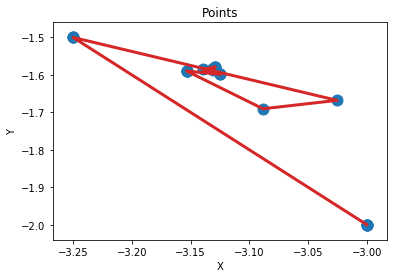

In [7]:
plt.plot(x, y, 'C3', lw=3)
plt.scatter(x, y, s=120)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points')

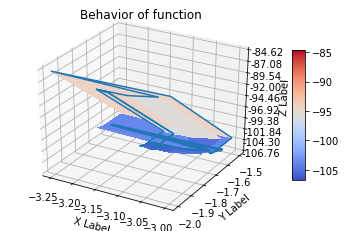

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

plt.title('Behavior of function')

# Make data.
X = x
Y = y
X, Y = np.meshgrid(X, Y)
Z = np.sin(Y)*np.exp((1-np.cos(X))**2) + np.cos(X)*np.exp((1 - np.sin(Y))**2) + (X - Y)**2


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-10.01, 10.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.6, aspect=10)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

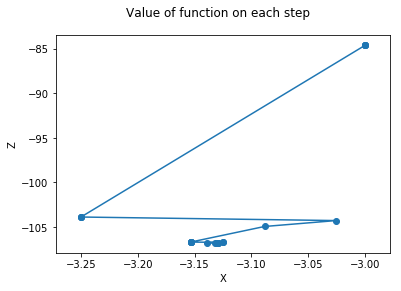

In [9]:
import matplotlib.pyplot as plt
import numpy as np

X = x
Y = func_b_array
#X, Y = np.meshgrid(X, Y)
#Z = np.sin(Y)*np.exp((1-np.cos(X))**2) + np.cos(X)*np.exp((1 - np.sin(Y))**2) + (X - Y)**2

fig, axs = plt.subplots()

axs.scatter(X, Y)
axs.plot(X, Y)

fig.suptitle('Value of function on each step')
plt.xlabel('X')
plt.ylabel('Z')

plt.show()

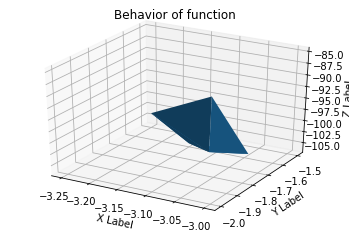

In [10]:
x = np.asarray(x)
y = np.asarray(y)
z = np.sin(y)*np.exp((1-np.cos(x))**2) + np.cos(x)*np.exp((1 - np.sin(y))**2) + (x - y)**2

fig = plt.figure()
ax = fig.gca(projection='3d')

plt.title('Behavior of function')
ax.plot_trisurf(x, y, z, linewidth=0.9, antialiased=True)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Demonstrate that the algorithm may converge to different points depending on the starting point. Report explicitly two distinct starting points x0 and the corresponding x∗.

In [13]:
first_point1 = [-5, -5]
second_point1 = [-6, -1]
third_point1 = [-3, -1]


best1, good1, worst1 = sort_points(first_point1, second_point1, third_point1)
print(best1, good1, worst1)

f_best1, func_b_array1, points_b_array1, number1 = NM_method(best1, good1, worst1, ro = 1, hi = 2, gamma = 1/2, sigma = 1/2)

[-3, -1] [-5, -5] [-6, -1]


In [14]:
print('Best value of function:', f_best1)

Best value of function: -106.76452541597462


In [15]:
first_point2 = [-6, -6]
second_point2 = [-3.6, -1.1]
third_point2 = [-3, -1]


best2, good2, worst2 = sort_points(first_point2, second_point2, third_point2)
print(best2, good2, worst2)

f_best2, func_b_array2, points_b_array2, number2 = NM_method(best2, good2, worst2, ro = 1, hi = 2, gamma = 1/2, sigma = 1/2)

[-3, -1] [-3.6, -1.1] [-6, -6]


In [16]:
print('Best value of function:', f_best2)

Best value of function: -106.76452593250413


In [17]:
first_point3 = [-5, -5]
second_point3 = [-9, -9.2]
third_point3 = [-4.9, -5.5]


best3, good3, worst3 = sort_points(first_point3, second_point3, third_point3)
print(best3, good3, worst3)

f_best3, func_b_array3, points_b_array3, number3 = NM_method(best3, good3, worst3, ro = 1, hi = 2, gamma = 1/2, sigma = 1/2)

[-5, -5] [-4.9, -5.5] [-9, -9.2]


In [18]:
print('Best value of function:', f_best3)

Best value of function: 1.4885851366578347


With a small change in the point, the function starts to behave unpredictably.

Examine the behavior of the method for various parameters α, β and γ. For one chosen x0 show that the method may converge to different points. Report parameter values and x∗.


In [19]:
print('Best value of function:', f_best, 'for the parameters reflection(ro) = 1, expansion(hi) = 2, contraction(gamma) = 1/2, shrinkage(sigma) = 1/2') 

Best value of function: -106.7644762948073 for the parameters reflection(ro) = 1, expansion(hi) = 2, contraction(gamma) = 1/2, shrinkage(sigma) = 1/2


In [20]:
ro1 = 2 #reflection
hi1 = 4 #expansion
gamma1 = 1/5 #contraction
sigma1 = 1/5 #shrinkage

f_best_1, func_b_array_1, points_b_array_1, number_1 = NM_method(best, good, worst, ro1, hi1, gamma1, sigma1)
print('Best value of function:', f_best_1)

Best value of function: -102.00059285837627


In [21]:
ro2 = 4 #reflection
hi2 = 8 #expansion
gamma2 = 1/6 #contraction
sigma2 = 1/3 #shrinkage

f_best_2, func_b_array_2, points_b_array_2, number_2 = NM_method(best, good, worst, ro2, hi2, gamma2, sigma2)
print('Best value of function:', f_best_2)

Best value of function: -97.85795024612254


The result changes when the parameters change.

## 4 Coordinate descend – 6 points

In [28]:
def diff_x(x, y):
    func_diff_x = 2*(x-y) - np.sin(x)*np.exp((1-np.sin(y))**2) + 2*np.sin(x)*(np.exp((1-np.cos(x))**2))*(1-np.cos(x))*np.sin(y)
    return func_diff_x

def diff_y(x, y):
    func_diff_y = -2*(x-y) + np.cos(y)*np.exp((1-np.cos(x))**2) - 2*np.cos(x)*np.cos(y)*(1-np.sin(y))*np.exp((1-np.sin(y))**2)
    return func_diff_y

def Coordinate_descend(point, alfa, iterat):
    
    k = 1
    x_array = [point[0]]
    y_array = [point[1]]
    function = compute(point)
    funct = [function]
    
    num=0
  
    while k < iterat:
        
        x_array.append(x_array[k-1] - alfa*diff_x(x_array[k-1], y_array[k-1]))
        y_array.append(y_array[k-1] - alfa*diff_y(x_array[k-1], y_array[k-1]))
        
        #alfa = alfa/(k)
        #print(alfa)
        points = [x_array[k], y_array[k]]
        function = compute(points)
        funct.append(function)
        
        k+=1
        
        if (function + 106.7645) < 10e-3:
            num +=1
        
    return function, funct, x_array, y_array, num

In [29]:
point = [-3, -2]
alfa = 0.006
iterat = 100
function, funct, x_array, y_array, num  = Coordinate_descend(point, alfa, iterat)

In [30]:
function

-106.7645367492647

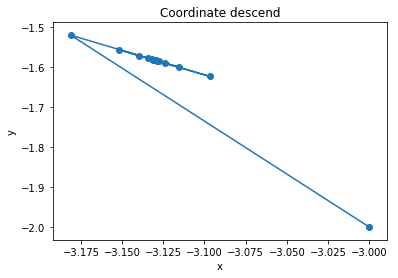

In [31]:
plt.plot(x_array, y_array)
plt.scatter(x_array, y_array)
plt.title('Coordinate descend')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

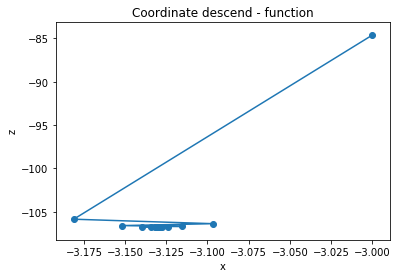

In [32]:
plt.plot(x_array, funct)
plt.scatter(x_array, funct)
plt.title('Coordinate descend - function')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [34]:
print('The number of iteration that is necessary for Nelder Mead method:', number)

The number of iteration that is necessary for Nelder Mead method: 26


In [35]:
print('The number of iteration that is necessary for Coordinate descend method:',num)

The number of iteration that is necessary for Coordinate descend method: 93


Nelder Mead method is faster than Coordinate descend method.